In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv(
    r"C:\minipj_1\data\자동차 증감 25-24년.csv",
    encoding="cp949")

In [31]:
df

,년월,시도명,시군구,승용관용,승용자가용,승용영업용,승용계,승합관용,승합자가용,승합영업용,...,화물계,특수관용,특수자가용,특수영업용,특수계,관용,자가용,영업용,계,전월대비_증감
0,202401,서울,강남구,154,215,268,17,940,233,362,...,4,624,179,13,704,2,398,16,281,NaN
25,202402,서울,강남구,154,217,167,17,423,234,744,...,4,611,178,13,694,2,433,16,305,24.0
50,202403,서울,강남구,154,217,524,17,38,234,716,...,4,577,178,13,665,2,426,16,269,-36.0
75,202404,서울,강남구,154,217,733,16,813,234,700,...,4,573,179,13,682,2,421,16,282,13.0
100,202405,서울,강남구,153,218,216,16,595,234,964,...,4,549,179,13,661,2,436,16,276,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,202507,서울,중랑구,80,91,320,5,935,97,335,...,3,368,123,11,209,2,763,14,95,-28.0
499,202508,서울,중랑구,80,91,317,5,922,97,319,...,3,355,123,11,183,2,773,14,79,-16.0
524,202509,서울,중랑구,79,91,343,5,958,97,380,...,3,329,122,11,140,2,760,14,22,-57.0
549,202510,서울,중랑구,79,91,332,5,950,97,361,...,3,305,123,11,148,2,761,14,32,10.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년월      575 non-null    int64 
 1   시도명     575 non-null    object
 2   시군구     575 non-null    object
 3   승용관용    575 non-null    int64 
 4   승용자가용   575 non-null    int64 
 5   승용영업용   575 non-null    int64 
 6   승용계     575 non-null    int64 
 7   승합관용    575 non-null    int64 
 8   승합자가용   575 non-null    int64 
 9   승합영업용   575 non-null    int64 
 10  승합계     575 non-null    int64 
 11  화물관용    575 non-null    int64 
 12  화물자가용   575 non-null    int64 
 13  화물영업용   575 non-null    int64 
 14  화물계     575 non-null    int64 
 15  특수관용    575 non-null    int64 
 16  특수자가용   575 non-null    int64 
 17  특수영업용   575 non-null    int64 
 18  특수계     575 non-null    int64 
 19  관용      575 non-null    int64 
 20  자가용     575 non-null    int64 
 21  영업용     575 non-null    int64 
 22  계       575 non-null    in

In [14]:
df.columns

Index(['년월', '시도명', '시군구', '승용관용', '승용자가용', '승용영업용', '승용계', '승합관용', '승합자가용',
       '승합영업용', '승합계', '화물관용', '화물자가용', '화물영업용', '화물계', '특수관용', '특수자가용',
       '특수영업용', '특수계', '관용', '자가용', '영업용', '계'],
      dtype='object')

In [15]:
df.head()

,년월,시도명,시군구,승용관용,승용자가용,승용영업용,승용계,승합관용,승합자가용,승합영업용,...,화물영업용,화물계,특수관용,특수자가용,특수영업용,특수계,관용,자가용,영업용,계
0,202401,서울,강남구,154,215,268,17,940,233,362,...,543,4,624,179,13,704,2,398,16,281
1,202401,서울,강동구,114,129,486,5,41,134,641,...,800,4,198,148,12,102,2,545,14,795
2,202401,서울,강북구,105,60,527,2,98,62,730,...,718,3,6,132,7,24,1,310,8,466
3,202401,서울,강서구,135,168,140,9,873,178,148,...,1,332,5,714,170,16,444,4,369,20
4,202401,서울,관악구,91,99,635,3,79,102,805,...,347,3,516,145,9,211,2,225,11,581


In [19]:
# 1. 특정 시점(예: 가장 최근 월)의 데이터만 추출 (시계열 제거)
df_recent = df[df['년월'] == 202412]

In [20]:
# 2. 지역별 특성 지표 계산
# 자치구별 승용차 대비 화물차 비율 (지역 성격 파악)
df_recent['화물차_비율'] = (df_recent['화물계'] / df_recent['승용계']) * 100

C:\Users\skh52\AppData\Local\Temp\ipykernel_19816\3071648753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['화물차_비율'] = (df_recent['화물계'] / df_recent['승용계']) * 100


In [24]:
# 3. 영업용 차량 비중 계산
df_recent['영업용_비중'] = (df_recent['영업용'] / df_recent['계']) * 100

C:\Users\skh52\AppData\Local\Temp\ipykernel_19816\3286032057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['영업용_비중'] = (df_recent['영업용'] / df_recent['계']) * 100


In [28]:
district_data = df.groupby('시군구')['계'].mean().sort_values(ascending=False)

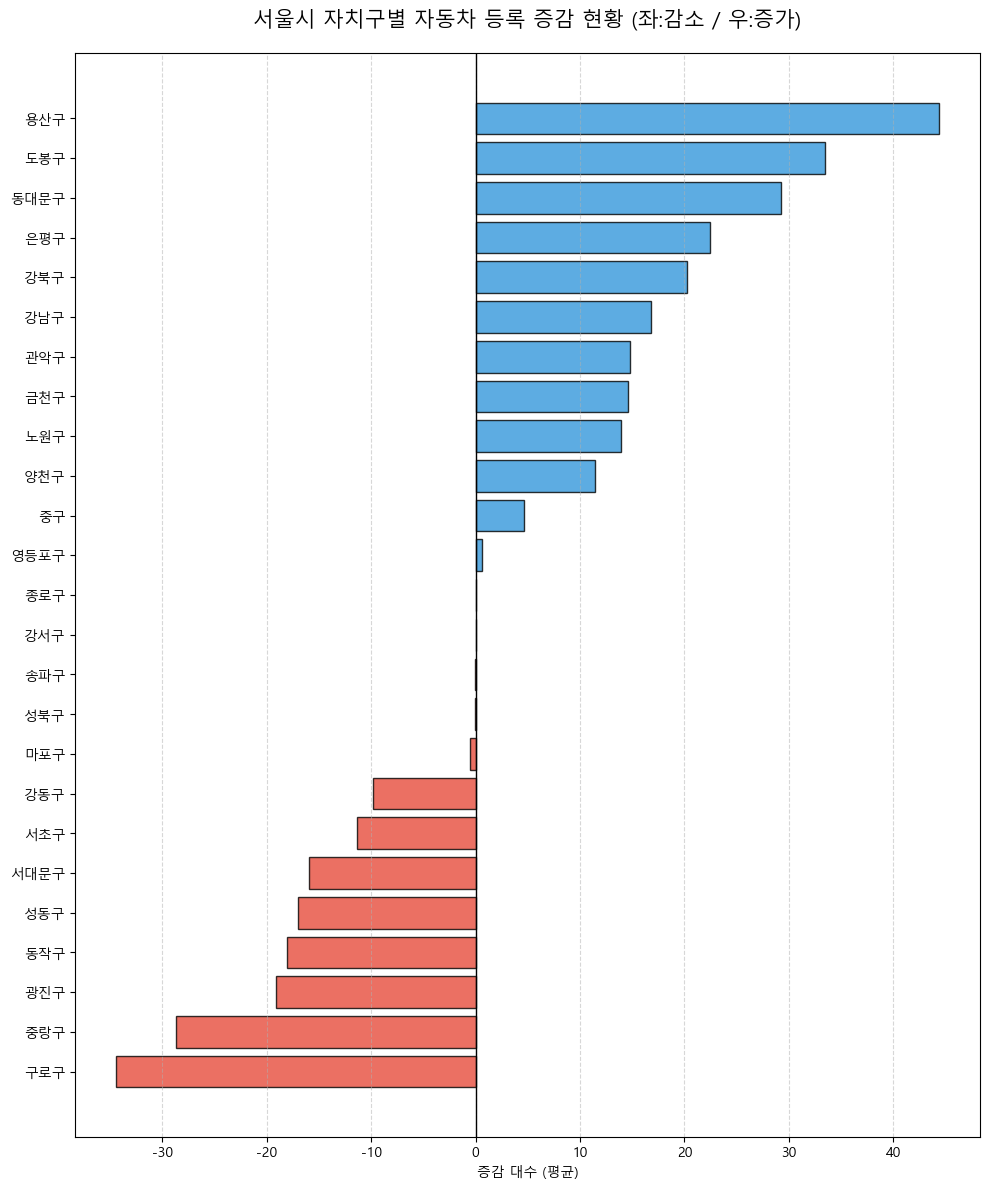

In [38]:
# 1. 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 2. 데이터 전처리 (전월 대비 증감량 계산 예시)
# 실제 데이터프레임 df에서 '전월대비_증감' 컬럼을 사용합니다.
# 시계열을 뺐으므로 자치구별 최근 증감 평균값을 산출합니다.
df_change = df.groupby('시군구')['전월대비_증감'].mean(numeric_only=True).sort_values()

# 3. 가로 막대 그래프 시각화 (양방향)
fig, ax = plt.subplots(figsize=(10, 12))

# 증가(오른쪽)와 감소(왼쪽)를 색상으로 구분
colors = ['#e74c3c' if x < 0 else '#3498db' for x in df_change.values]

# barh를 사용하여 가로로 그리기
ax.barh(df_change.index, df_change.values, color=colors, edgecolor='black', alpha=0.8)

# 4. 그래프 꾸미기 (숫자 표시 제거)
ax.set_title('서울시 자치구별 자동차 등록 증감 현황 (좌:감소 / 우:증가)', fontsize=15, pad=20)
ax.set_xlabel('증감 대수 (평균)')
ax.axvline(0, color='black', linewidth=1) # 기준선(0) 강조
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()